<a href="https://colab.research.google.com/github/Ram04420/TensorFlow/blob/master/Credit_Card_Fraud_Detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [0]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, MaxPool1D, BatchNormalization, Conv1D,Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
data = pd.read_csv('/content/drive/My Drive/Datasets/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.shape

(284807, 31)

In [6]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

**Balance Dataset**

In [10]:
non_fraud = data[data['Class']==0]
fraud = data[data['Class']==1]
non_fraud.shape, fraud.shape

((284315, 31), (492, 31))

In [14]:
non_fraud = non_fraud.sample(fraud.shape[0])
non_fraud.shape

(492, 31)

In [15]:
data = fraud.append(non_fraud, ignore_index=True)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,129840.0,-0.900437,1.754512,2.543339,3.973365,0.089685,2.086978,-0.430726,0.553758,-1.026386,1.942735,-1.663531,-0.538909,1.527110,-0.850480,1.396622,0.696584,-0.483502,1.011503,1.059144,0.759936,0.086432,0.621599,-0.362282,0.051794,0.241988,0.577976,0.617500,0.299683,6.64,0
980,111133.0,2.104391,0.100381,-1.418627,0.318853,0.436612,-0.708901,0.087526,-0.374746,2.009336,-0.478356,0.006473,-2.142919,2.054824,1.831198,0.149551,-0.226850,0.062180,0.439432,-0.283287,-0.241097,0.099031,0.697460,-0.013048,0.444533,0.377218,-0.476415,-0.021479,-0.055496,1.00,0
981,96763.0,2.056948,-0.086067,-0.936874,0.484793,-0.115058,-0.950381,-0.016599,-0.416495,2.311624,-0.592183,-0.024092,-1.550242,2.360385,1.315460,-1.264637,-0.705027,0.617919,-0.252065,0.087247,-0.237091,-0.065895,0.434630,0.029636,-0.000042,0.213656,0.154935,-0.047399,-0.067756,4.06,0
982,133920.0,2.013780,-0.112168,-1.098120,0.433677,-0.094518,-0.422946,-0.456496,0.031492,1.061787,-0.499191,-0.795691,-0.313188,-0.512546,-1.248923,0.771460,0.964484,0.385587,0.299442,-0.133421,-0.151835,-0.359858,-0.996074,0.418803,0.326187,-0.584835,0.103557,-0.025284,-0.010137,11.94,0


In [17]:
data['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [0]:
x = data.drop('Class', axis = 1)
y = data['Class']

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, stratify = y)

In [20]:
x_train.shape, x_test.shape

((787, 30), (197, 30))

In [0]:
scaler  = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [24]:
x_train

array([[ 1.47358339,  0.31684521, -0.17721815, ...,  0.09787875,
        -0.34703511, -0.41360309],
       [-0.76231721,  0.63308274, -0.58834309, ..., -0.03113892,
        -0.03974621, -0.37486279],
       [-1.40592096, -2.11122525,  1.23187005, ...,  2.50036082,
        -2.40452313, -0.48176757],
       ...,
       [-1.53769783, -0.40158912,  0.31876486, ..., -1.35237031,
         1.56615949, -0.34622264],
       [-1.51756757,  0.6408017 , -0.41468621, ..., -0.15362057,
        -0.09742318, -0.46078324],
       [-1.22188486,  0.2056902 , -0.22805264, ..., -0.16557328,
        -0.27962381, -0.27602891]])

In [0]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [26]:
x_train.shape

(787, 30)

In [0]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [28]:
x_train.shape, x_test.shape

((787, 30, 1), (197, 30, 1))

**Build CNN**

In [0]:
epochs = 20
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = x_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)              0

In [0]:
model.compile(optimizer=Adam(lr = 0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [33]:
history = model.fit(x_train, y_train, epochs=epochs, verbose= 1, validation_data=(x_test, y_test))

Epoch 1/20
25/25 [==============================] - 0s 16ms/step - loss: 0.9090 - accuracy: 0.6112 - val_loss: 0.6185 - val_accuracy: 0.8173
Epoch 2/20
25/25 [==============================] - 0s 7ms/step - loss: 0.5665 - accuracy: 0.7675 - val_loss: 0.5708 - val_accuracy: 0.8579
Epoch 3/20
25/25 [==============================] - 0s 8ms/step - loss: 0.4134 - accuracy: 0.8437 - val_loss: 0.5379 - val_accuracy: 0.8883
Epoch 4/20
25/25 [==============================] - 0s 7ms/step - loss: 0.3918 - accuracy: 0.8615 - val_loss: 0.5091 - val_accuracy: 0.8934
Epoch 5/20
25/25 [==============================] - 0s 7ms/step - loss: 0.3312 - accuracy: 0.8755 - val_loss: 0.4821 - val_accuracy: 0.8883
Epoch 6/20
25/25 [==============================] - 0s 8ms/step - loss: 0.2897 - accuracy: 0.8920 - val_loss: 0.4517 - val_accuracy: 0.8832
Epoch 7/20
25/25 [==============================] - 0s 8ms/step - loss: 0.3007 - accuracy: 0.8945 - val_loss: 0.4116 - val_accuracy: 0.8985
Epoch 8/20
25/25 [=

In [0]:

def plot_learningCurve(history, epoch):
  #plot training accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train' , 'val'], loc = 'upper left')
  plt.show()
  #plot taining loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('epoch')
  plt.legend(['Train', 'val'], loc = 'upper left')
  plt.show()

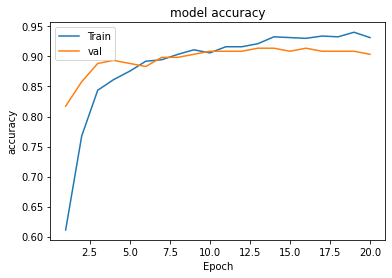

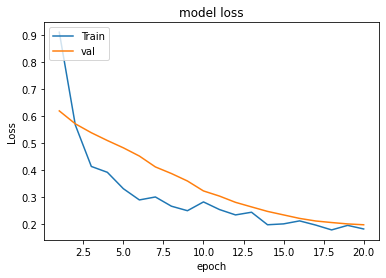

In [35]:
plot_learningCurve(history, 20)

**Adding MAxpool**

In [0]:
epochs = 50
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = x_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))


In [43]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_6 (Batch (None, 29, 32)            128       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 14, 32)            0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 14, 32)            0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 13, 64)            4160      
_________________________________________________________________
batch_normalization_7 (Batch (None, 13, 64)            256       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 6, 64)            

In [0]:
model.compile(optimizer=Adam(lr = 0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [45]:
history = model.fit(x_train, y_train, epochs=epochs, verbose= 1, validation_data=(x_test, y_test))

Epoch 1/50
25/25 [==============================] - 0s 11ms/step - loss: 1.0893 - accuracy: 0.5845 - val_loss: 0.6581 - val_accuracy: 0.6650
Epoch 2/50
25/25 [==============================] - 0s 6ms/step - loss: 0.8955 - accuracy: 0.6226 - val_loss: 0.6315 - val_accuracy: 0.8173
Epoch 3/50
25/25 [==============================] - 0s 6ms/step - loss: 0.7329 - accuracy: 0.7078 - val_loss: 0.6016 - val_accuracy: 0.8680
Epoch 4/50
25/25 [==============================] - 0s 5ms/step - loss: 0.6207 - accuracy: 0.7446 - val_loss: 0.5693 - val_accuracy: 0.8680
Epoch 5/50
25/25 [==============================] - 0s 6ms/step - loss: 0.5970 - accuracy: 0.7662 - val_loss: 0.5318 - val_accuracy: 0.8782
Epoch 6/50
25/25 [==============================] - 0s 6ms/step - loss: 0.4899 - accuracy: 0.7992 - val_loss: 0.4909 - val_accuracy: 0.8883
Epoch 7/50
25/25 [==============================] - 0s 6ms/step - loss: 0.4553 - accuracy: 0.8208 - val_loss: 0.4526 - val_accuracy: 0.8731
Epoch 8/50
25/25 [=

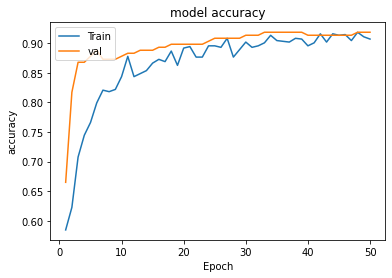

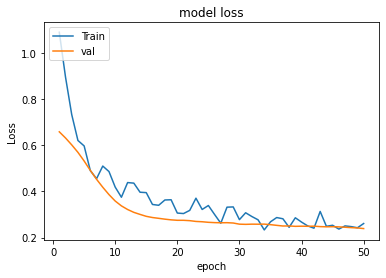

In [47]:
plot_learningCurve(history, 50)